<a href="https://colab.research.google.com/github/pavitrageez/ML/blob/main/Greedy_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install shapely numpy matplotlib scikit-learn pandas

In [9]:
#Write a python-based code.
#- To triangulate a convex polygon of 7 points using Greedy algorithm
#- To find the given polyline (L1) is Monotone polyline or not. (Use monotonicity with respect to the lines y = 0, y = x/2, y = x, y = 2x, x = 0, y = -2x, y = -x, and y = -x/2
# L1{(5,7), (4, 6.5), (6.5, 5), (6.5, 4), (7.5,4), (7.5,3), (8,2), (7,0)}

In [10]:
import math
import matplotlib.pyplot as plt

# PART A) GREEDY TRIANGULATION FOR A CONVEX 7-POINT POLYGON

# Replace this with YOUR 7 convex polygon points in order (clockwise)
poly7 = [(0,0), (3,0), (5,2), (4,5), (2,6), (-1,4), (-2,2)]


def dist(p, q):
    return math.hypot(p[0]-q[0], p[1]-q[1])

def orient(a, b, c):
    # cross product sign of (b-a) x (c-a)
    val = (b[0]-a[0])*(c[1]-a[1]) - (b[1]-a[1])*(c[0]-a[0])
    if abs(val) < 1e-12:
        return 0
    return 1 if val > 0 else -1

def on_segment(a, b, c):
    return (min(a[0], b[0]) - 1e-12 <= c[0] <= max(a[0], b[0]) + 1e-12 and
            min(a[1], b[1]) - 1e-12 <= c[1] <= max(a[1], b[1]) + 1e-12)

def segments_intersect(p1, p2, q1, q2):
    # True if segments intersect (including collinear touch/overlap)
    o1 = orient(p1, p2, q1)
    o2 = orient(p1, p2, q2)
    o3 = orient(q1, q2, p1)
    o4 = orient(q1, q2, p2)

    if o1 != o2 and o3 != o4:
        return True
    if o1 == 0 and on_segment(p1, p2, q1): return True
    if o2 == 0 and on_segment(p1, p2, q2): return True
    if o3 == 0 and on_segment(q1, q2, p1): return True
    if o4 == 0 and on_segment(q1, q2, p2): return True
    return False

def share_endpoint(seg1, seg2):
    a, b = seg1
    c, d = seg2
    return (a == c) or (a == d) or (b == c) or (b == d)

    Greedy triangulation:
    - generate all diagonals (non-adjacent vertex pairs)
    - sort by length
    - add diagonal if it doesn't intersect boundary edges or already-added diagonals
    For convex polygon, this will always succeed to pick (n-3) diagonals.
    Returns list of selected diagonals as index pairs (i,j).
    

Selected diagonals (index pairs): [(0, 5), (2, 4), (0, 2), (0, 4)]
Selected diagonals (point pairs): [((0, 0), (-1, 4)), ((5, 2), (2, 6)), ((0, 0), (5, 2)), ((0, 0), (2, 6))]


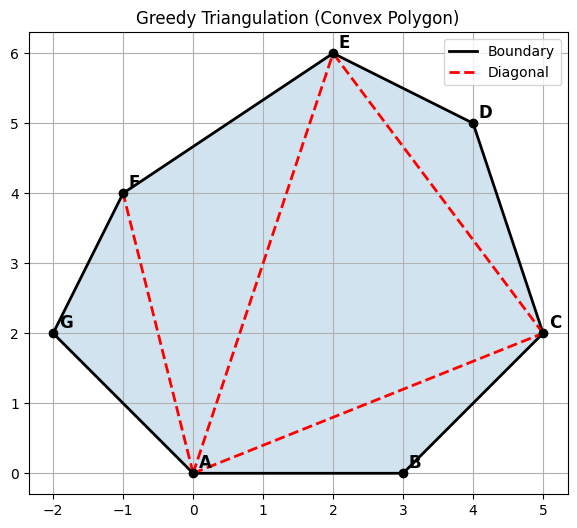

In [11]:

def greedy_triangulation_convex(points):

    n = len(points)
    edges = [(points[i], points[(i+1) % n]) for i in range(n)]

    # candidate diagonals (i,j), skip adjacent and wrap-adjacent
    candidates = []
    for i in range(n):
        for j in range(i+1, n):
            if abs(i-j) == 1 or abs(i-j) == n-1:
                continue
            candidates.append((i, j))

    # sort by length (greedy)
    candidates.sort(key=lambda ij: dist(points[ij[0]], points[ij[1]]))

    selected = []
    need = n - 3

    def valid_diag(i, j):
        a, b = points[i], points[j]

        # no intersection with polygon edges (except shared endpoints)
        for e in edges:
            if share_endpoint((a, b), e):
                continue
            if segments_intersect(a, b, e[0], e[1]):
                return False

        # no intersection with previously selected diagonals (except shared endpoints)
        for (k, l) in selected:
            c, d = points[k], points[l]
            if share_endpoint((a, b), (c, d)):
                continue
            if segments_intersect(a, b, c, d):
                return False

        return True

    for i, j in candidates:
        if valid_diag(i, j):
            selected.append((i, j))
        if len(selected) == need:
            break

    return selected

# Run greedy triangulation for the 7-point polygon
diags7 = greedy_triangulation_convex(poly7)
print("Selected diagonals (index pairs):", diags7)
print("Selected diagonals (point pairs):", [(poly7[i], poly7[j]) for i, j in diags7])

# Plot polygon + diagonals
def plot_triangulation(points, diagonals, title="Greedy Triangulation (Convex Polygon)"):
    n = len(points)
    closed = points + [points[0]]

    plt.figure(figsize=(7, 6))
    plt.title(title)

    # fill polygon lightly
    xs = [p[0] for p in closed]
    ys = [p[1] for p in closed]
    plt.fill(xs, ys, alpha=0.2)

    # boundary
    plt.plot(xs, ys, 'k-', linewidth=2, label="Boundary")

    # diagonals
    first = True
    for (i, j) in diagonals:
        a, b = points[i], points[j]
        plt.plot([a[0], b[0]], [a[1], b[1]],
                 'r--', linewidth=2,
                 label="Diagonal" if first else None)
        first = False

    # labels A for 7 points -> A to G
    labels = "ABCDEFG"
    for idx, (x, y) in enumerate(points):
        plt.plot(x, y, 'ko')
        plt.text(x + 0.08, y + 0.08, labels[idx], fontsize=12, weight='bold')

    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

plot_triangulation(poly7, diags7)


Monotonicity results for polyline L1:
y = 0     ->  Not monotone
y = x/2   ->  Not monotone
y = x     ->  Not monotone
y = 2x    ->  Not monotone
x = 0     ->  Monotone
y = -2x   ->  Monotone
y = -x    ->  Not monotone
y = -x/2  ->  Not monotone


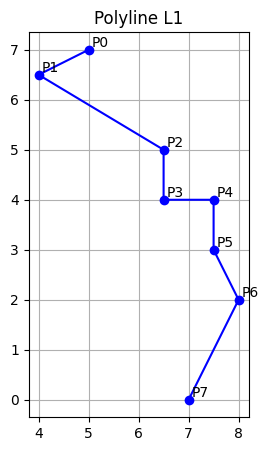

In [12]:
# PART B) MONOTONICITY CHECK FOR THE GIVEN POLYLINE L1

# Given polyline L1
L1 = [(5,7), (4,6.5), (6.5,5), (6.5,4), (7.5,4), (7.5,3), (8,2), (7,0)]

def is_monotone_along_direction(polyline, direction):

    ux, uy = direction
    norm = math.hypot(ux, uy)
    ux, uy = ux / norm, uy / norm

    t = [p[0]*ux + p[1]*uy for p in polyline]

    nondecreasing = all(t[i] <= t[i+1] + 1e-12 for i in range(len(t)-1))
    nonincreasing = all(t[i] >= t[i+1] - 1e-12 for i in range(len(t)-1))
    return nondecreasing or nonincreasing, t

# Directions for the given lines
# For y = m x, direction vector can be (1, m)
line_directions = {
    "y = 0"     : (1, 0),
    "y = x/2"   : (1, 0.5),
    "y = x"     : (1, 1),
    "y = 2x"    : (1, 2),
    "x = 0"     : (0, 1),
    "y = -2x"   : (1, -2),
    "y = -x"    : (1, -1),
    "y = -x/2"  : (1, -0.5),
}

print("\nMonotonicity results for polyline L1:")
for name, direc in line_directions.items():
    ok, projections = is_monotone_along_direction(L1, direc)
    print(f"{name:8s}  ->  {'Monotone' if ok else 'Not monotone'}")

# Plot the polyline L1
plt.figure(figsize=(6, 5))
plt.title("Polyline L1")
plt.plot([p[0] for p in L1], [p[1] for p in L1], 'b-o')
for i, (x, y) in enumerate(L1):
    plt.text(x + 0.06, y + 0.06, f"P{i}", fontsize=10)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
